#  拟合曲线

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter
from math import log
from math import e

In [222]:
data = pd.read_csv('tongji.csv')

In [223]:
data = data.fillna(value=0)
data = data.sort_values(["following_count"],ascending=True)

In [224]:
following_count = pd.to_numeric(data.following_count)  # 类型转换
cfollowing = Counter()   # 使用Counter类进行统计
# print(following_count)
for item in following_count:
    cfollowing[item] += 1
#print(cfollowing)

In [225]:
# Counter.most_common(cfollowing,10)  # 输出前十个结果

## 将Counter字典类型转化为DataFrame类型

In [226]:
df = pd.DataFrame.from_dict(cfollowing, orient='index').reset_index()
df.columns = ['key', 'cnts']
df.head()

,key,cnts
0,0.0,3540
1,1.0,5860
2,2.0,4470
3,3.0,3954
4,4.0,3374


In [227]:
df = np.log(df+e)
df.head()

,key,cnts
0,1.000000,8.172650
1,1.313262,8.676369
2,1.551445,8.405752
3,1.743668,8.283170
4,1.904832,8.124660


In [228]:
#df.plot.scatter(x='key',y='cnts',color='DarkBlue')

##  方法一：
[微博地址](https://blog.csdn.net/kk185800961/article/details/79220724)

In [229]:
import statsmodels.formula.api as smf 
from mpl_toolkits.mplot3d import Axes3D

X = df['key'] 
y = df['cnts']

                            OLS Regression Results                            
Dep. Variable:                   cnts   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 2.128e+04
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        16:18:24   Log-Likelihood:                -1912.7
No. Observations:                2917   AIC:                             3829.
Df Residuals:                    2915   BIC:                             3841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4753      0.057    184.664      0.0

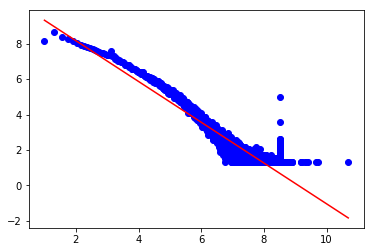

In [231]:
est = smf.ols(formula='cnts ~ key', data=df).fit()  
y_pred = est.predict(X)  
print(est.summary())    
fig = plt.figure()  
ax = fig.add_subplot(111)  
ax.scatter(X, y, c='b')  
ax.plot(X, y_pred, c='r')  
plt.show() 

## 方法二：
[博客地址](https://blog.csdn.net/qq_17119267/article/details/79108333)

In [237]:
x = df['key'].values
X = sm.add_constant(x)
y = df['cnts'].values


In [238]:
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 2.128e+04
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        16:19:43   Log-Likelihood:                -1912.7
No. Observations:                2917   AIC:                             3829.
Df Residuals:                    2915   BIC:                             3841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4753      0.057    184.664      0.0

(0, 10, 0, 10)

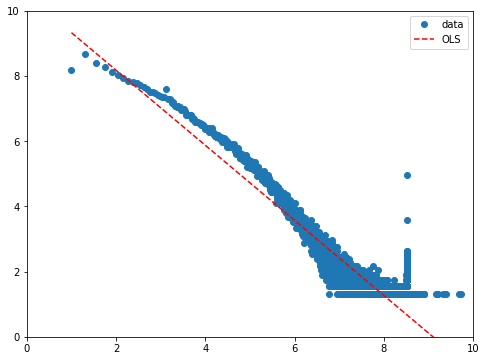

In [241]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, results.fittedvalues, 'r--', label="OLS")
ax.legend(loc='best')
ax.axis((0, 10, 0, 10))

## 清晰的讲解
[博客地址](https://www.joinquant.com/post/1786?f=study&m=python)